In [1]:
import pandas as pd
import numpy as np


In [2]:
df1= pd.read_excel('Dataset.xlsx') 
df=df1.sample(frac = 0.25)

In [3]:
df.head()

,SL,Emotion,Text,Year,Racial Biases,Hatred Percentage,Depression Percentage
33487,33488,angry,বিস্মিত বিশ্লেষকরা কি গত দুই বৎসর বংলাদেশে বসব...,2021,NaN,NaN,NaN
33037,33038,angry,ভোট কেন্দ্র দখলের ঘটনা না ঘটলে লীগ ৫৭০০ ভোটও...,2021,NaN,NaN,NaN
28189,28190,sad,এই বাংলায় সিএএ ও এনপিআর কার্যকর করতে দেওয়া হব...,2020,NaN,NaN,NaN
12263,12264,sad,"একজন পুলিশ ৫০,০০০ টাকা শুধুমাত্র একটি বাসার ভা...",2018,NaN,NaN,NaN
863,864,angry,"আপনারা কিসের যুক্তি নিয়ে বলছেন, আমার শুধু একটা...",2016,NaN,NaN,NaN


In [4]:
df.tail()

,SL,Emotion,Text,Year,Racial Biases,Hatred Percentage,Depression Percentage
32973,32974,surprise,আপনি কিভাবে এত ওভার কনফারমড,2021,NaN,NaN,NaN
30281,30282,happy,ওই বৈঠকে কোয়াডকে আরও বেশি কার্যকর করে তোলার উ...,2021,NaN,NaN,NaN
28206,28207,sad,এখানকার মানুষকে হতাশ করা হয়েছে।,2020,NaN,NaN,NaN
829,830,angry,"অবশেষে বিএনপি গণতন্ত্র বুঝেছে !!!? অবশ্যই না, ...",2016,NaN,NaN,NaN
23295,23296,surprise,আমার এম্বি দিয়ে আপনাদের বিজ্ঞাপন দেখে নিলাম। ব...,2019,NaN,NaN,NaN


In [5]:
df["Emotion"].value_counts()

angry       1526
fear        1512
happy       1502
sad         1497
disgust     1490
surprise    1473
Name: Emotion, dtype: int64

In [6]:
class_names = ['disgust','angry','happy','surprise','fear','sad']

In [7]:
encoding = {
    'disgust': 0, 
    'angry' :1,
    'happy':2,
    'surprise':3,
    'fear':4,
    'sad':5
}

In [8]:
text = df['Text'].values.tolist()
emotion= df['Emotion'].tolist()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , emotion, test_size=.2, random_state=42)

In [10]:
df["Emotion"].value_counts()

angry       1526
fear        1512
happy       1502
sad         1497
disgust     1490
surprise    1473
Name: Emotion, dtype: int64

In [11]:
import ktrain
from ktrain import text
MODEL_NAME = 'sagorsarker/bangla-bert-base'
t = text.Transformer(MODEL_NAME, maxlen=500)


In [12]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 16
	95percentile : 44
	99percentile : 67


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 15
	95percentile : 43
	99percentile : 69


In [13]:
model = t.get_classifier()

In [14]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

simulating training for different learning rates... this may take a few moments...
1200/1200 [==============================] - 12292s 10s/step - loss: 141.6218 - mae: 5.6466


done.
Visually inspect loss plot and select learning rate associated with falling loss


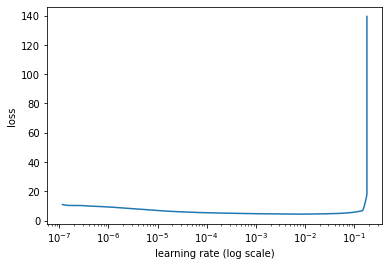

In [42]:
learner.lr_find(show_plot=True, max_epochs=1)

In [15]:
learner.fit_onecycle(2e-5, 5)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
1200/1200 [==============================] - 12915s 11s/step - loss: 1.6650 - accuracy: 0.2993 - val_loss: 1.4550 - val_accuracy: 0.4556
Epoch 2/5
1200/1200 [==============================] - 13196s 11s/step - loss: 1.2673 - accuracy: 0.5387 - val_loss: 1.1831 - val_accuracy: 0.5717
Epoch 3/5
1200/1200 [==============================] - 12836s 11s/step - loss: 0.7817 - accuracy: 0.7321 - val_loss: 1.0838 - val_accuracy: 0.6650
Epoch 4/5
1200/1200 [==============================] - 12826s 11s/step - loss: 0.3470 - accuracy: 0.8939 - val_loss: 1.0807 - val_accuracy: 0.6994
Epoch 5/5
1200/1200 [==============================] - 12824s 11s/step - loss: 0.1542 - accuracy: 0.9546 - val_loss: 1.1456 - val_accuracy: 0.7072


In [16]:
learner.validate(val_data=(val), class_names=class_names)

              precision    recall  f1-score   support

     disgust       0.69      0.62      0.65       323
       angry       0.74      0.73      0.74       316
       happy       0.72      0.81      0.76       270
    surprise       0.72      0.70      0.71       294
        fear       0.60      0.62      0.61       314
         sad       0.79      0.78      0.79       283

    accuracy                           0.71      1800
   macro avg       0.71      0.71      0.71      1800
weighted avg       0.71      0.71      0.71      1800



array([[200,  38,  18,  13,  41,  13],
       [ 23, 231,  15,  11,  24,  12],
       [ 15,   4, 220,   8,  17,   6],
       [ 16,   8,  13, 206,  37,  14],
       [ 26,  24,  28,  29, 194,  13],
       [ 10,   7,  13,  18,  13, 222]], dtype=int64)